<a href="https://colab.research.google.com/github/Panthisarang/Machine-Learning-Projects/blob/main/ML_Usecase_1_to_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rock vs Mine prediction

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##Data collection and processing

In [ ]:
#Loading the dataset to pandas df
sonar_data = pd.read_csv('/content/drive/MyDrive/sonar_data.csv',header=None)

In [ ]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
sonar_data.shape

(208, 61)

In [ ]:
sonar_data.describe() #this gives statistical measures of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
sonar_data[60].value_counts()


60
M    111
R     97
Name: count, dtype: int64

M--> Mine

R-->Rock

In [ ]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
from re import X
#Separating data and labels
X = sonar_data.drop(columns=60,axis=1)
Y = sonar_data[60]

In [ ]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

##Training and Test Data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(208, 60) (187, 60) (21, 60)


In [ ]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

##Model Training --> Logistic Regression

In [ ]:
model= LogisticRegression()

In [ ]:
#training the logistic regression model with training model
model.fit(X_train,Y_train)

LogisticRegression()

##Model evaluation

In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy on Training data: ',training_data_accuracy)

Accuracy on Training data:  0.8342245989304813


In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy on Test data: ',test_data_accuracy)

Accuracy on Test data:  0.7619047619047619


##Making a Predictive System

In [ ]:
input_data = (0.0286,0.0453,0.0277,0.0174,0.0384,0.099,0.1201,0.1833,0.2105,0.3039,0.2988,0.425,0.6343,0.8198,1,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.589,0.2872,0.2043,0.5782,0.5389,0.375,0.3411,0.5067,0.558,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.265,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062)

#changing the inpud_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')

['R']
The object is a Rock


In [ ]:
input_data = (0.0335,0.0134,0.0696,0.118,0.0348,0.118,0.1948,0.1607,0.3036,0.4372,0.5533,0.5771,0.7022,0.7067,0.7367,0.7391,0.8622,0.9458,0.8782,0.7913,0.576,0.3061,0.0563,0.0239,0.2554,0.4862,0.5027,0.4402,0.2847,0.1797,0.356,0.3522,0.3321,0.3112,0.3638,0.0754,0.1834,0.182,0.1815,0.1593,0.0576,0.0954,0.1086,0.0812,0.0784,0.0487,0.0439,0.0586,0.037,0.0185,0.0302,0.0244,0.0232,0.0093,0.0159,0.0193,0.0032,0.0377,0.0126,0.0156)

#changing the inpud_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')


['M']
The object is a Mine


#Diabetes Prediction

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

##Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset.shape

(768, 9)

In [ ]:
#Statistical measures of data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0--> Non-Diabetic

1-->Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


##Separating the data and labels

In [ ]:
X= diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


##Data Standardization

In [ ]:
scaler= StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardization_data = scaler.transform(X)

In [ ]:
print(standardization_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X= standardization_data
Y=diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


##Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


##Training the model

In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
#training the support vector  machine classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

##Model Evaluation

In [ ]:
#accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy score of the training data: ',training_data_accuracy*100)

Accuracy score of the training data:  78.66449511400651


In [ ]:
#accuracy score on testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy score of the testing data',test_data_accuracy*100)

Accuracy score of the testing data 77.27272727272727


##Predictive System

In [ ]:
input_data=(1,89,66,23,94,28.1,0.167,21)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data= scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)

if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data=(2,197,70,45,543,30.5,0.158,53)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data= scaler.transform(input_data_reshaped)
# print(std_data)

prediction = classifier.predict(std_data)

if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Spam mail Prediction

Importing the dependencies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##Data Collection and Pre-processing

In [ ]:
raw_mail_data = pd.read_csv('/content/drive/MyDrive/mail_data.csv')

In [ ]:
raw_mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
#replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
mail_data.shape

(5572, 2)

##Label Encoding

In [ ]:
#label spam mail as 0; ham mail as 1;
mail_data.loc[mail_data['Category']=='spam','Category',]=0
mail_data.loc[mail_data['Category']=='ham','Category',]=1

spam-0

  ham-1

In [ ]:
#separating the data as texts and label
X = mail_data['Message']
Y = mail_data['Category']

In [ ]:
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


##Splitting the train test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


##Feature Extraction

text data into meaningful numerical values

In [ ]:
#transform the text data to feature vectors that can be used as input to the logistic regression
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

#convert Y as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train)
print(X_train_features)

##Training the model

Logistic Regression

In [ ]:
model= LogisticRegression()

In [ ]:
#training the logistic regression model with the training data
model.fit(X_train_features,Y_train)

LogisticRegression()

##Evaluating the trained model

In [ ]:
# prediction on train model
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train,prediction_on_training_data)

In [ ]:
print(accuracy_on_training_data*100)

96.70181736594121


In [ ]:
#prediction on test model
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [ ]:
print(accuracy_on_test_data*100)

96.59192825112108


##Building the predictive system

In [ ]:
input_mail = ["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"]
#convert text to feature vectors(Numerical value)
input_data_features = feature_extraction.transform(input_mail)

#making prediction
prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Ham mail


In [ ]:
input_mail = ["England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/ú1.20 POBOXox36504W45WQ 16+"]
#convert text to feature vectors(Numerical value)
input_data_features = feature_extraction.transform(input_mail)

#making prediction
prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Ham mail


wrong ans

In [ ]:
input_mail = ["Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or £1000. To claim txt DIS to 87121 18+6*£1.50(moreFrmMob. ShrAcomOrSglSuplt)10, LS1 3AJ"]
#convert text to feature vectors(Numerical value)
input_data_features = feature_extraction.transform(input_mail)

#making prediction
prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Ham mail')
else:
  print('Spam mail')

[0]
Spam mail


right ans

In [ ]:

input_mail = ["BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu"]
#convert text to feature vectors(Numerical value)
input_data_features = feature_extraction.transform(input_mail)

#making prediction
prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Ham mail')
else:
  print('Spam mail')

[0]
Spam mail


#Heart Disease Prediction


Importing the dependencies


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##Data collection and processing

In [ ]:
#loading the csv data to a pandas dataframe
heart_data = pd.read_csv('/content/drive/MyDrive/heart_disease_data.csv')

In [ ]:
#print the first 5 rows
heart_data.head()
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
#getting info about the data
heart_data.info()
heart_data.isnull().sum()

In [ ]:
#statistical measures of data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#checking the distribution of target variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective heart

0 --> Healthy heart

##Splitting

Splitting the features and target

In [ ]:
X= heart_data.drop(columns='target',axis=1)
Y=heart_data['target']

In [ ]:
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

Splitting the data into Training data and test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


##Model Training

Logistic regression

In [ ]:
#training the logistic regression model with training data
model= LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##Model evaluation

In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print(training_data_accuracy)

0.8512396694214877


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print(test_data_accuracy*100)

81.9672131147541


##Building a predictive system

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The person does not have heart defect')
else:
  print('The person has heart defect')

[0]
The person does not have heart defect


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (52,1,2,172,199,1,1,162,0,0.5,2,0,3)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The person does not have heart defect')
else:
  print('The person has heart defect')

[1]
The person has heart defect


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#House price Prediction

Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

##Importing the boston house price dataset

In [ ]:
# house_data = pd.read_csv('/content/drive/MyDrive/BostonHousing.csv')

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [ ]:
house_data=data

In [ ]:
# house_data_pd=pd.read_csv('/content/sample_data/california_housing_test.csv')


In [ ]:
# Assuming 'feature_names' is a list defined elsewhere,
# and 'house_data' is your NumPy array
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]  # Replace with your actual feature names
house_data_df = pd.DataFrame(house_data, columns=feature_names)

In [ ]:
house_data_df['price'] = target

In [ ]:
print(house_data_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [ ]:
# checking the number of rows and columns in the data frame
house_data_df.shape

(506, 14)

In [ ]:
house_data_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [ ]:
#statistical measures of dataset
house_data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##Understanding the correlation between various features in the dataset

<Axes: >

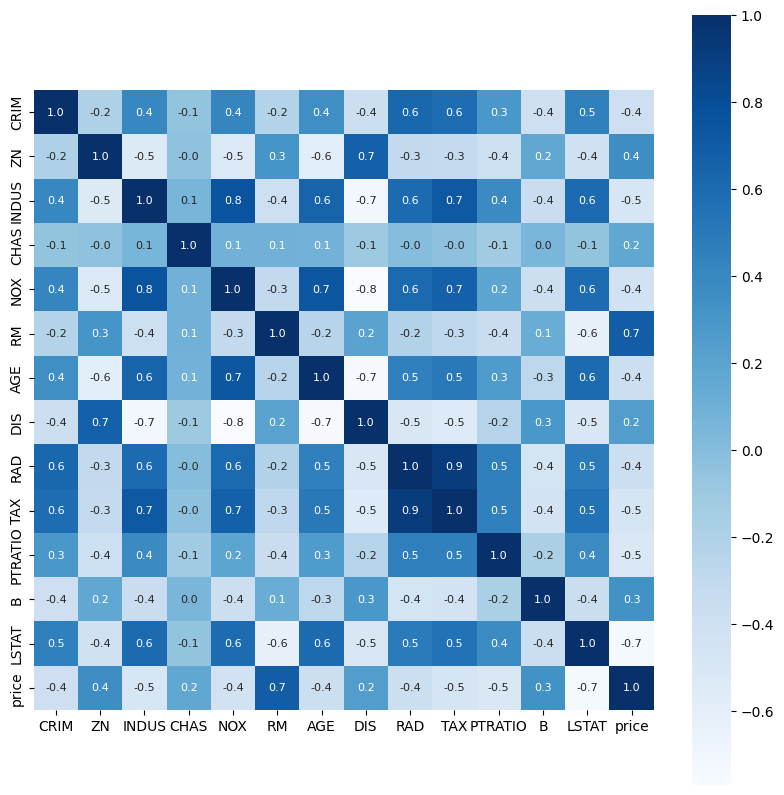

In [ ]:
correlation = house_data_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


##Splitting

In [ ]:
X= house_data_df.drop(['price'],axis=1)
Y=house_data_df['price']

In [ ]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


##Model training

XGBoostRegressor

In [ ]:
#loading the model
model=XGBRegressor()

In [ ]:
#training the model with X_train'
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

##Evaluation

Prediction on training data

In [ ]:
#accuracy for prediction on training data
training_data_prediction = model.predict(X_train)
test_data_prediction = model.predict(X_test)

In [ ]:
print(training_data_prediction)
print(test_data_prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [ ]:
#R squared error
score_1 = metrics.r2_score(Y_train,training_data_prediction)
print("R squared error : ", score_1)

R squared error :  0.9999980039471451


In [ ]:
#Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("Mean absolute error : ", score_2)

Mean absolute error :  0.0091330346494618


In [ ]:
score_3 = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ", score_3)

R squared error :  0.9051721149855378


In [ ]:
score_4 = metrics.mean_absolute_error(Y_test,test_data_prediction)
print("Mean absolute error : ", score_4)

Mean absolute error :  2.0748727686264927


###Visualizing the actual prices and predicted prices

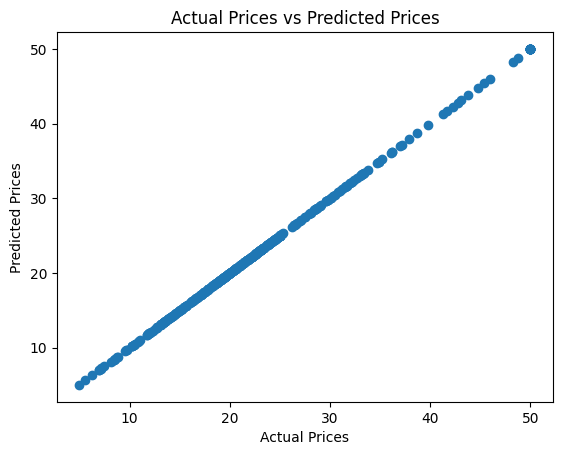

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

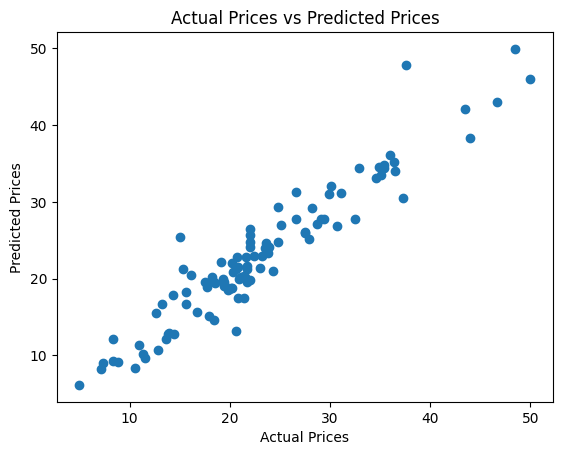

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

#Loan Status prediction

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

##Data collection and processing

In [ ]:
#loading the dataset to pandas df
loan_data = pd.read_csv('/content/drive/MyDrive/loan_dataset.csv')

In [ ]:
type(loan_data)

pandas.core.frame.DataFrame

In [ ]:
loan_data.head()
loan_data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_data.shape

(614, 13)

In [ ]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#dropping the missing values
loan_data = loan_data.dropna()

In [ ]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#Label encoding
loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
loan_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
# Dependent column values
loan_data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [ ]:
#replacing the value of 3+ to 4
loan_data = loan_data.replace(to_replace='3+',value=4)

In [ ]:
loan_data['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

##Data Visualisation

<Axes: xlabel='Education', ylabel='count'>

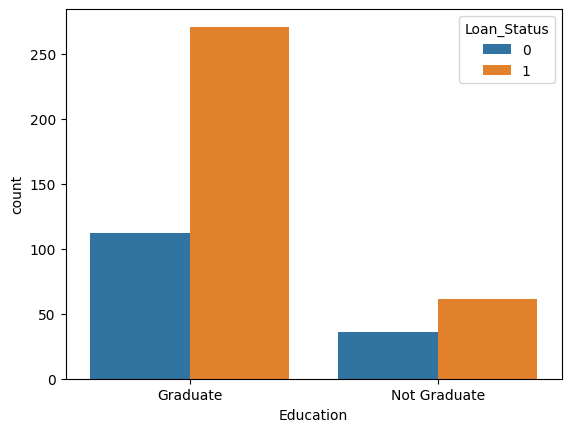

In [ ]:
#education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan_data)

<Axes: xlabel='Married', ylabel='count'>

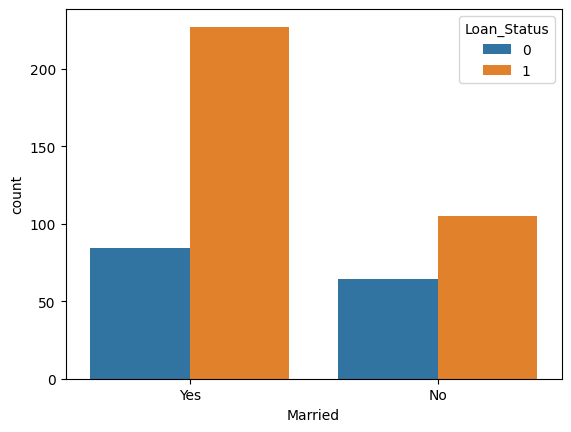

In [ ]:
# marital status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_data)

In [ ]:
#convert categorical columns to numerical values
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                   'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


##Splitting

In [ ]:
X = loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_data['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


##Training the model

Support vector machine model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the svm model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

##Model Evauation

In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ',test_data_accuracy)

Accuracy on test data :  0.8333333333333334


In [ ]:
#accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ',training_data_accuracy)

Accuracy on training data :  0.7986111111111112


In [ ]:
input= (1,1,1,1,0,3000,0.0,66.0,360.0,1.0,2)
input_as_numpy_array = np.asarray(input)
input_reshaped = input_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_reshaped)
print(prediction)
if (prediction[0]==0):
  print('Loan not approved')
else:
  print('Loan approved')

[1]
Loan approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
input1=('Female','No',2,'Not Graduate','Yes',4006,1526,168,360,1,'Rural')
gender_map = {'Male': 0, 'Female': 1}
married_map = {'Yes': 1, 'No': 0}
education_map = {'Graduate': 1, 'Not Graduate': 0}
selfemployed_map = {'Yes': 1, 'No': 0}
propertyarea_map = {'Urban': 2, 'Semiurban': 1, 'Rural': 0}

# Convert the input tuple to a list for mutability
input1_list = list(input1)

# Map the values
input1_list[0] = gender_map.get(input1_list[0])
input1_list[1] = married_map.get(input1_list[1])
input1_list[3] = education_map.get(input1_list[3])
input1_list[4] = selfemployed_map.get(input1_list[4])
input1_list[10] = propertyarea_map.get(input1_list[10])

# Convert back to tuple if needed
input1_updated = tuple(input1_list)

print(input1_updated)
input_as_numpy_array = np.asarray(input1_updated)
input_reshaped = input_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_reshaped)
print(prediction)
if (prediction[0]==0):
  print('Loan not approved')
else:
  print('Loan approved')

(1, 0, 2, 0, 1, 4006, 1526, 168, 360, 1, 0)
[1]
Loan approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


#Big Mart Sales Prediction

Importing Dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

##Data Collection and Analysis

In [ ]:
#Loading the dataset from CSV file to Pandas dataframe
big_mart_data = pd.read_csv('/content/drive/MyDrive/big_mart_data.csv')

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Number of data points and number of features
big_mart_data.shape

(8523, 12)

In [ ]:
#getting some information about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Feature:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type  

In [ ]:
#checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##Handling Missing values

Mean -> average values

Mode -> Most repeated values

In [ ]:
#Mean value of Item_Weight column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [ ]:
#Filling the missing values is Item_Weight column with Mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

In [ ]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing the missing values in Outlet_Size with mode

In [ ]:
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [ ]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
missing_values = big_mart_data['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])


In [ ]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##Data Analysis

In [ ]:
#Statistical Measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical features

In [ ]:
sns.set()

<ipython-input-17-b555d762d4c7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


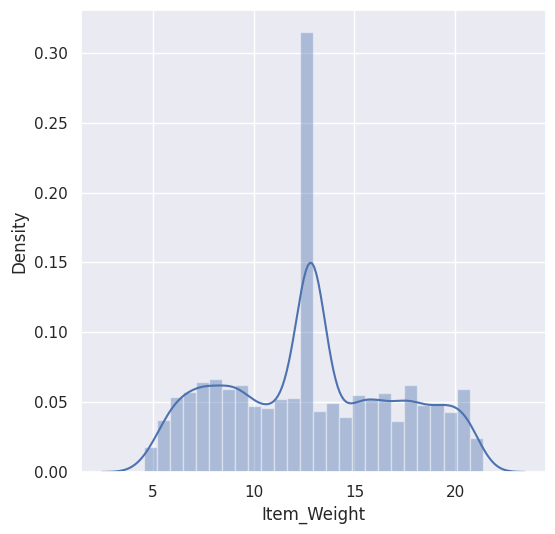

In [ ]:
#Item_Weight Distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

<ipython-input-18-cda0b3512e23>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


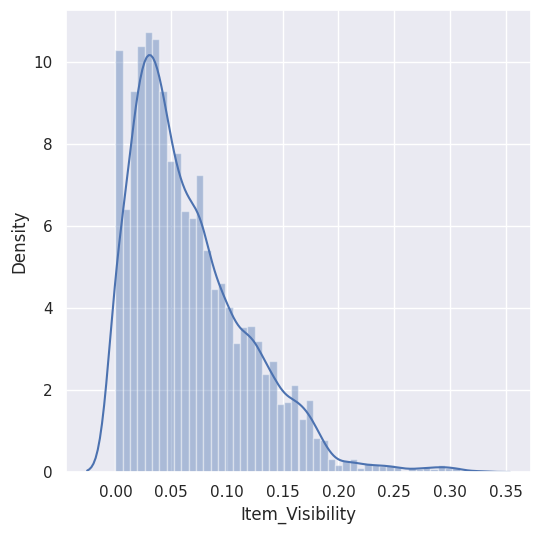

In [ ]:
#Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

<ipython-input-19-67abdd12079c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


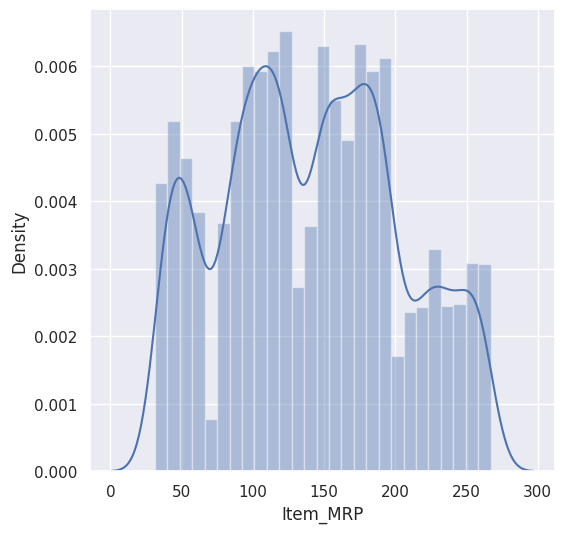

In [ ]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

<ipython-input-20-a6dc3ae66c67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


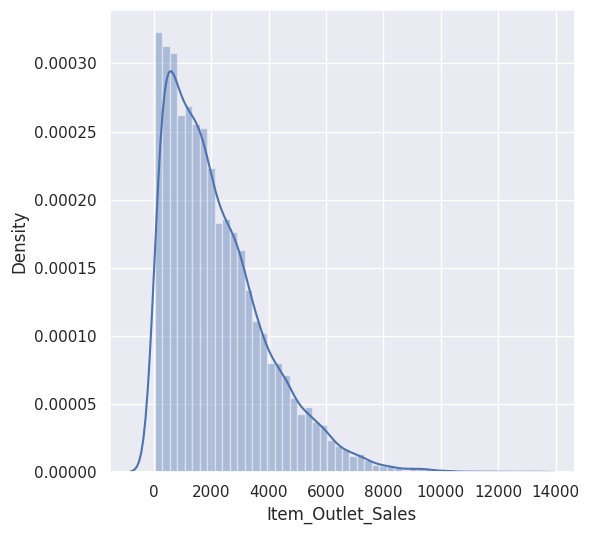

In [ ]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()



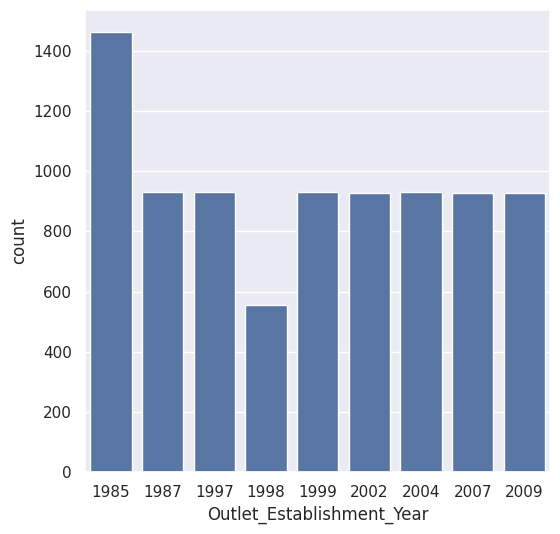

In [ ]:
# Outlet_Establishment_Year Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

Categorical Features

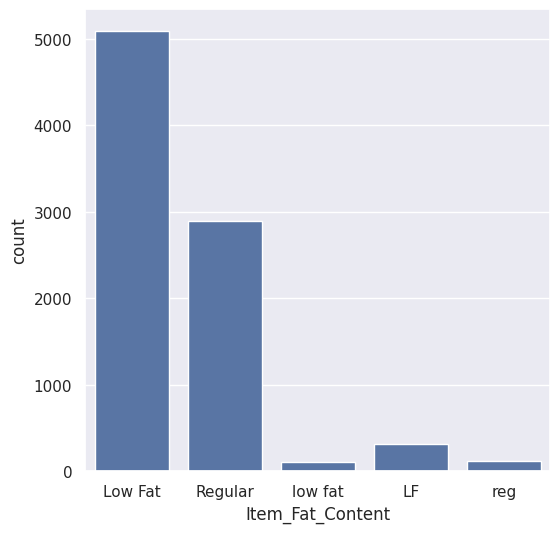

In [ ]:
 #Item_Fat_Content distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

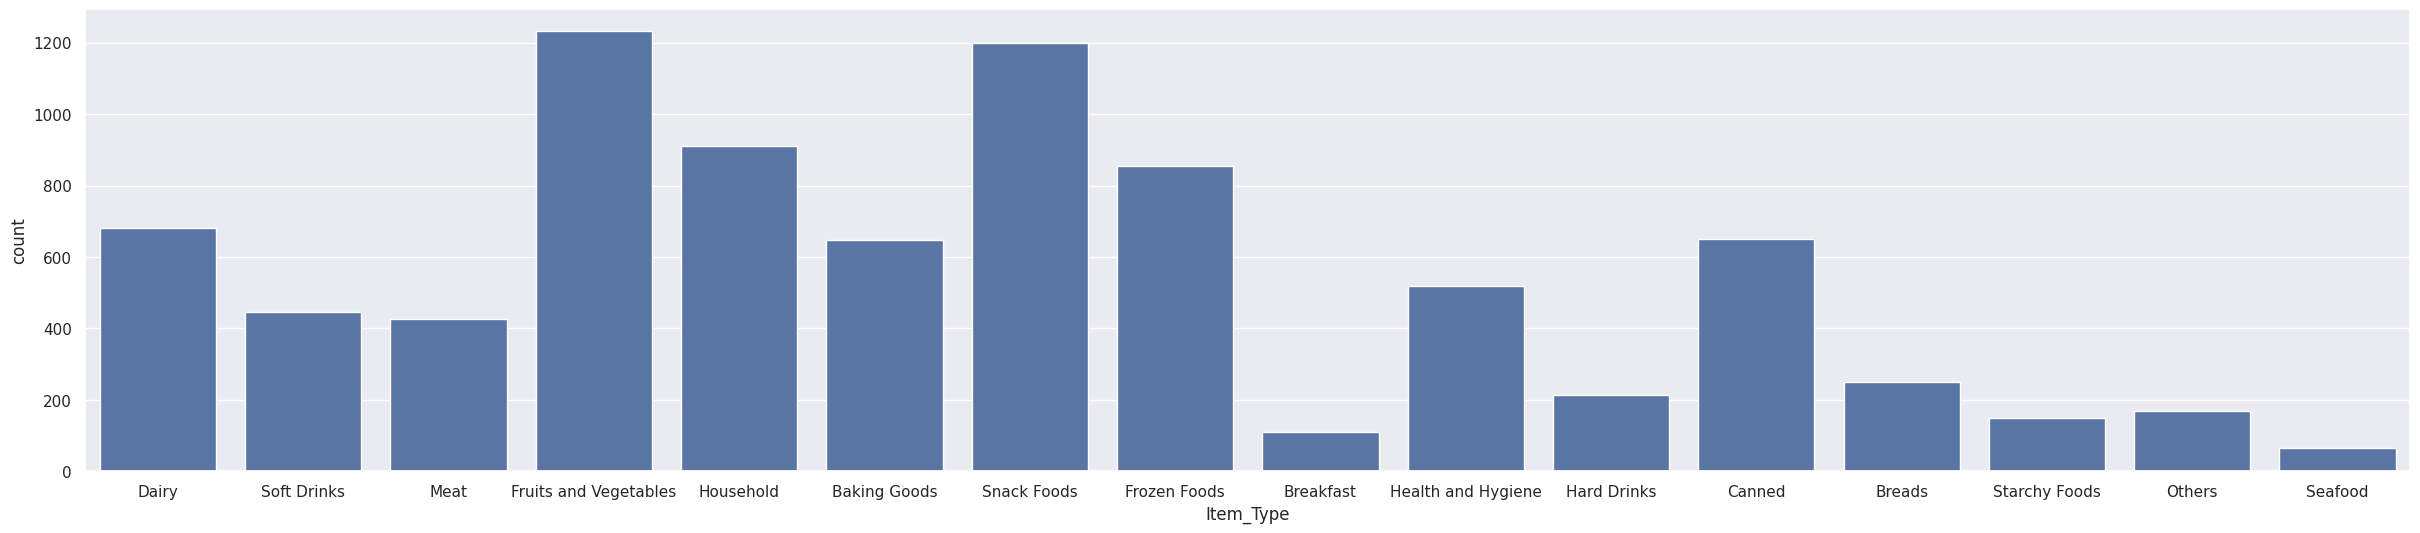

In [ ]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.show()

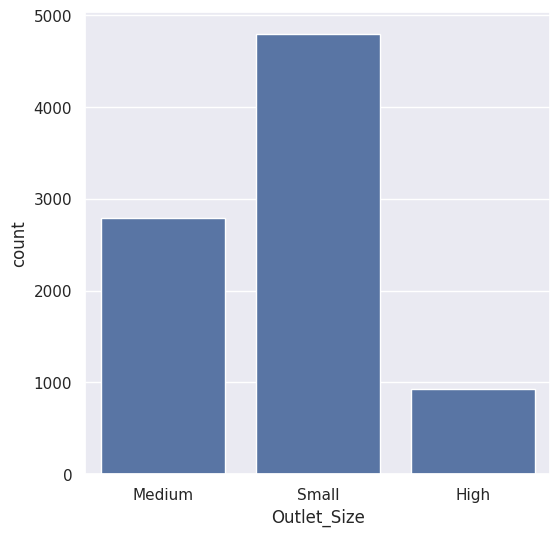

In [ ]:
#Outlet_size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=big_mart_data)
plt.show()

##Data Preprocessing

In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Label Encoding

In [ ]:
encoder = LabelEncoder()

In [ ]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])


In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting features and target


In [ ]:
X = big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [ ]:
print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

Splitting into training data and testing data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


##Model training and prediction

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)
print(training_data_prediction)

[2241.8008 2784.4749 3348.1802 ... 2619.9922 1810.6472 2076.5325]


In [ ]:
#R squared value
score_1 = metrics.r2_score(Y_train,training_data_prediction)
print("R squared value : ", score_1)

R squared value :  0.8762174618111388


In [ ]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[2350.1606 1861.6439 1700.9556 ... 2857.3364 2405.3838 3876.3467]


In [ ]:
#R squared value
score_2 = metrics.r2_score(Y_test,test_data_prediction)
print("R squared value : ", score_2)

R squared value :  0.5017253991620692


#Breast Cancer Classification

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##Data Collection and processing

In [ ]:
#loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [ ]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [ ]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [ ]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [ ]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1 --> Benign

0 --> Malignant

In [ ]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Separating the features and target

In [ ]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

Splitting the data into training data & Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


##Model Training and evaluation

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression model using Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9472527472527472


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9298245614035088


##Predictive system

In [ ]:
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[1]
The Breast Cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#Calories Burnt Prediction

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

##Data Collection and processing

In [ ]:
calories = pd.read_csv('/content/drive/MyDrive/calories.csv')

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/drive/MyDrive/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
calories_data.shape

(15000, 9)

In [ ]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

DATA ANALYSIS

In [ ]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


##Data Visualization

In [ ]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

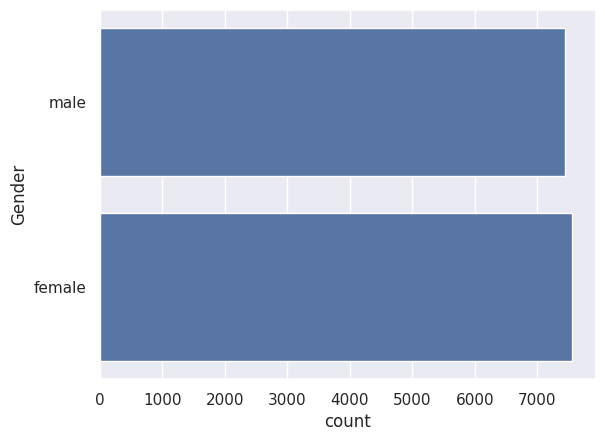

In [ ]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

<ipython-input-79-6cbf196d4d06>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

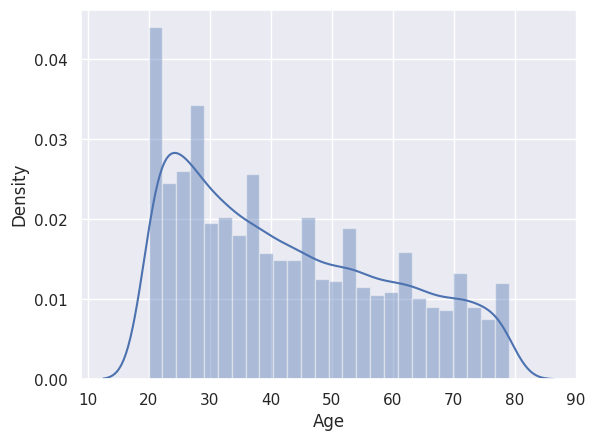

In [ ]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

<ipython-input-80-fdc2a1fecb6d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

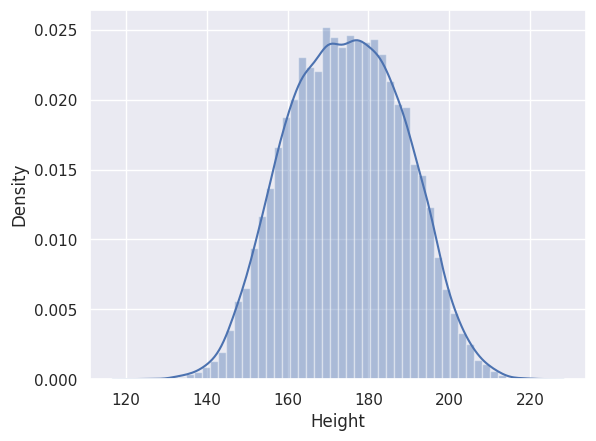

In [ ]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

<ipython-input-81-ac6457c483b4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

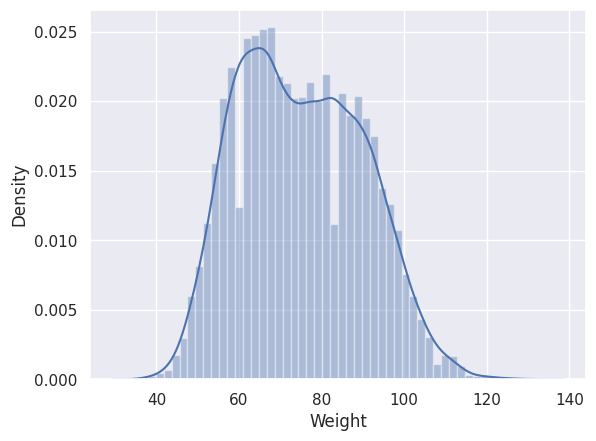

In [ ]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

Finding the Correlation in the dataset

- Positive Correlation
- Negative Correlation

In [ ]:
# Convert 'Gender' column to numerical representation
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)
# Now calculate the correlation
correlation = calories_data.corr()

<Axes: >

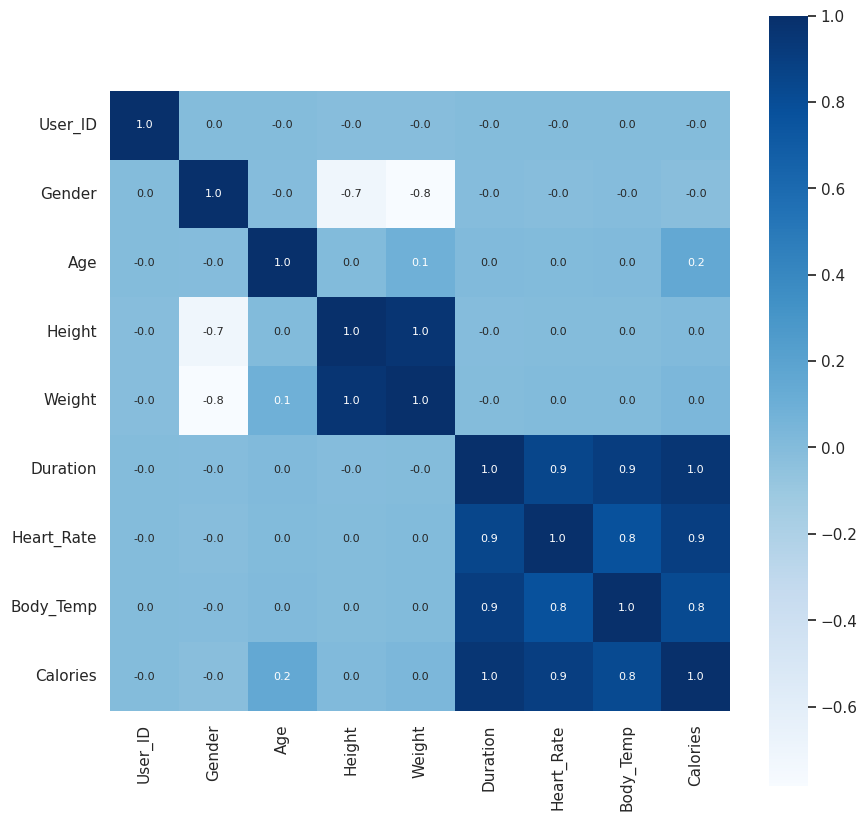

In [ ]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


##Splitting

Separating features and Target

In [ ]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

Splitting the data into training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


##Model training and evaluation

XGBoost Regressor

In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction on Test Data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean absolute error

In [ ]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [ ]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4833678883314132


#Movie Recommedation system

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Data Collection and Pre-processing

In [ ]:
#loading the data from the csv file to a pandas dataframe
movies_data = pd.read_csv('/content/drive/MyDrive/movies.csv')

In [ ]:
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
# number of rows and columns in the dataframe'
movies_data.shape

(4803, 24)

In [ ]:
#selecting the relevant features for recommendation
selected_features = ['genres','keywords','tagline','cast','director','overview']

In [ ]:
#replacing the null values with null string
for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [ ]:
#Combining all 6 features
combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']+' '+movies_data['overview']

In [ ]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [ ]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vectors)

  (0, 5245)	0.16506865163441017
  (0, 1014)	0.12285843797047788
  (0, 1243)	0.05270709034262742
  (0, 21523)	0.16650106431669984
  (0, 1281)	0.0319519027005067
  (0, 19650)	0.16120557402371172
  (0, 10368)	0.138482776543016
  (0, 2974)	0.09974129089792808
  (0, 27515)	0.1456922041909068
  (0, 2685)	0.09805341831299118
  (0, 4129)	0.06195738171764886
  (0, 18025)	0.1093940665047336
  (0, 28597)	0.15490753406550084
  (0, 19541)	0.04908322232312577
  (0, 18249)	0.14769810641761005
  (0, 27405)	0.031015019219557106
  (0, 7827)	0.17979882024342952
  (0, 14023)	0.04170092858483918
  (0, 17021)	0.14324534514274756
  (0, 20104)	0.19260031442011957
  (0, 4768)	0.12501550204808318
  (0, 239)	0.19716936546022965
  (0, 13474)	0.036478409857958735
  (0, 4288)	0.13213124585063998
  (0, 14180)	0.08418056281586365
  :	:
  (4802, 27153)	0.05940079357098276
  (4802, 19243)	0.061349419053434766
  (4802, 11941)	0.07829183421073846
  (4802, 29680)	0.07735547381237222
  (4802, 9346)	0.07104321122746965
  (4

##Cosine Similarity

In [ ]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [ ]:
print(similarity)

[[1.         0.05083168 0.0332947  ... 0.02749812 0.0304889  0.0072518 ]
 [0.05083168 1.         0.04356836 ... 0.05077045 0.03100979 0.01521198]
 [0.0332947  0.04356836 1.         ... 0.02646984 0.04751623 0.01372603]
 ...
 [0.02749812 0.05077045 0.02646984 ... 1.         0.03481447 0.03546821]
 [0.0304889  0.03100979 0.04751623 ... 0.03481447 1.         0.03098945]
 [0.0072518  0.01521198 0.01372603 ... 0.03546821 0.03098945 1.        ]]


In [ ]:
print(similarity.shape)

(4803, 4803)


##algorithm

Getting the movie name from the user

In [ ]:
# getting the movie name from the user

movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : spider man


In [ ]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Spider-Man', 'Inside Man', 'Superman']


In [ ]:
close_match = find_close_match[0]
print(close_match)

Spider-Man


In [ ]:
# finding the index of the movie with title

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

159


In [ ]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.03341013270121136), (1, 0.021552884129079006), (2, 0.01573476797029399), (3, 0.030172231471285046), (4, 0.04630937312487814), (5, 0.33165481944521596), (6, 0.015459007138838621), (7, 0.007868761016055402), (8, 0.018937214590688364), (9, 0.020693400149093003), (10, 0.033724566794966285), (11, 0.01800143446782206), (12, 0.019103790953882805), (13, 0.0176524683185065), (14, 0.03168424748735246), (15, 0.031754634502204726), (16, 0.005981697525448927), (17, 0.013452552827417624), (18, 0.0094502811267792), (19, 0.02590842952443445), (20, 0.11989084689930167), (21, 0.00478081577389855), (22, 0.015735937413798876), (23, 0.023510086722979454), (24, 0.0195521911528573), (25, 0.006596464162915541), (26, 0.009708115873933335), (27, 0.02123657029398566), (28, 0.013259919419896776), (29, 0.025410765200758068), (30, 0.26424462628281126), (31, 0.02416256824694273), (32, 0.02110415354406426), (33, 0.006402192684496154), (34, 0.011255349324438082), (35, 0.026397570475766), (36, 0.0076687346213403

In [ ]:
len(similarity_score)

4803

In [ ]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(159, 1.0000000000000002), (5, 0.33165481944521596), (30, 0.26424462628281126), (1534, 0.20704744117826848), (38, 0.12722073360097486), (431, 0.12267515598449447), (20, 0.11989084689930167), (37, 0.10323191934002364), (1796, 0.09576332899359531), (1523, 0.0941927950473168), (767, 0.09408033158665655), (3265, 0.09391911363717474), (2375, 0.09117776397811045), (1119, 0.0888786055504274), (2361, 0.08880201419832948), (2163, 0.08760973351617553), (953, 0.08744494623831751), (1559, 0.08631726463196235), (259, 0.08622194909791321), (382, 0.0842670506824993), (2183, 0.08201194357117281), (3044, 0.08188413849254811), (3949, 0.07904289740127948), (677, 0.07623670012212815), (1793, 0.07617688549159317), (3479, 0.0758273874741251), (3124, 0.07464923876073899), (328, 0.07240687188156449), (1427, 0.072039863332264), (2740, 0.07189406252950187), (2218, 0.07024502505211681), (2157, 0.06985062335788439), (3155, 0.06949939717179827), (3383, 0.06816089909449101), (1193, 0.0672359454504353), (1699, 0.06

In [ ]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Spider-Man
2 . Spider-Man 3
3 . Spider-Man 2
4 . Arachnophobia
5 . The Amazing Spider-Man 2
6 . Charlotte's Web
7 . The Amazing Spider-Man
8 . Oz: The Great and Powerful
9 . Brothers
10 . The Good German
11 . xXx: State of the Union
12 . Shadow of the Vampire
13 . Midnight Special
14 . 21 Jump Street
15 . The Ice Storm
16 . The Covenant
17 . Gremlins 2: The New Batch
18 . The Notebook
19 . Speed 2: Cruise Control
20 . Seabiscuit
21 . Home for the Holidays
22 . Get Over It
23 . Bachelorette
24 . Clear and Present Danger
25 . In Good Company
26 . The Virgin Suicides
27 . The Reef
28 . Finding Nemo
29 . Wonder Boys


##Movie Recommendation System

In [ ]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : the whale
Movies suggested for you : 

1 . The Swindle
2 . Betty Fisher and Other Stories
3 . The Horseman on the Roof
4 . The Country Doctor
5 . 8 Women
6 . Little White Lies
7 . Mississippi Mermaid
8 . Bizarre
9 . Nurse Betty
10 . Swimming Pool
11 . Little Nicholas
12 . The Happening
13 . As Above, So Below
14 . Assault on Precinct 13
15 . The Chorus
16 . A Monster in Paris
17 . Close Encounters of the Third Kind
18 . Transporter 2
19 . Annie Get Your Gun
20 . The Curse of the Jade Scorpion
21 . The Transporter
22 . Amour
23 . The Bélier Family
24 . Shade
25 . Man on Wire
26 . Troop Beverly Hills
27 . The Class
28 . 28 Days
29 . The Proposal


#Customer Segmentation using Clustering

Importing the dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

##Data collection and analysis

In [ ]:
#loading the data from the csv file to a pandas dataframe
customer_data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [ ]:
customer_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [ ]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [ ]:
X = customer_data.iloc[:,[3,4]].values

In [ ]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

##Choosing the number of clusters

WCSS -> Within Cluster Sum of Squares

In [ ]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

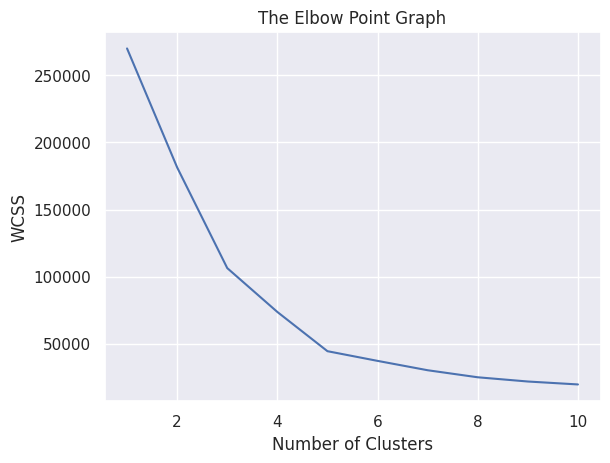

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

##Training the k-Means Clustering Model

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 Clusters - 0, 1, 2, 3, 4

##Visualizing all the clusters

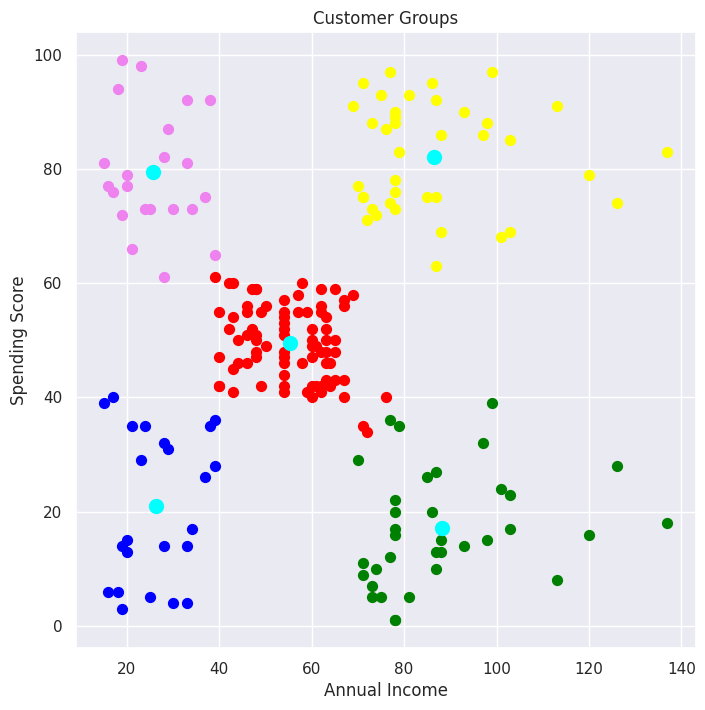

In [ ]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()